## Clustering Analysis

### Libraries & Dependencies

In [1]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.mixture import GaussianMixture # for GMM clustering
from sklearn import metrics # for calculating Silhouette score

import matplotlib.pyplot as plt # for data visualization
import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization

from geopy.geocoders import Nominatim # for getting city coordinates
from progressbar import ProgressBar # for displaying progress 
import time # for adding time delays

### Gaussian Mixture Model Clustering 

In [2]:
# Set Pandas options to display more columns
pd.options.display.max_columns=50

# Read in the weather data csv
df=pd.read_csv('weatherAUS.csv', encoding='utf-8')

# Drop records where target RainTomorrow=NaN
df=df[pd.isnull(df['RainTomorrow'])==False]

# For other columns with missing values, fill them in with column mean
df=df.fillna(df.mean())

# Add spaces between multiple words in location names
df['Location2']=df['Location'].str.replace( r"([A-Z])", r" \1").str.strip()
# Update Location for Pearce RAAF so it can be found by geolocator
df['Location2']=df['Location2'].apply(lambda x: 'Pearce, Bullsbrook' if x=='Pearce R A A F' else x)

# Show a snaphsot of data
df

<ipython-input-2-0ee476a87dde>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Location2']=df['Location'].str.replace( r"([A-Z])", r" \1").str.strip()


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6     5.469824   
1       2008-12-02   Albury      7.4     25.1       0.0     5.469824   
2       2008-12-03   Albury     12.9     25.7       0.0     5.469824   
3       2008-12-04   Albury      9.2     28.0       0.0     5.469824   
4       2008-12-05   Albury     17.5     32.3       1.0     5.469824   
...            ...      ...      ...      ...       ...          ...   
142188  2017-06-20    Uluru      3.5     21.8       0.0     5.469824   
142189  2017-06-21    Uluru      2.8     23.4       0.0     5.469824   
142190  2017-06-22    Uluru      3.6     25.3       0.0     5.469824   
142191  2017-06-23    Uluru      5.4     26.9       0.0     5.469824   
142192  2017-06-24    Uluru      7.8     27.0       0.0     5.469824   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0       7.624853           W           44.0          W        WNW   
1       7.624853         WNW           44.0        NNW        WSW   
2       7.624853         WSW           46.0          W        WSW   
3       7.624853          NE           24.0         SE          E   
4       7.624853           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
142188  7.624853           E           31.0        ESE          E   
142189  7.624853           E           31.0         SE        ENE   
142190  7.624853         NNW           22.0         SE          N   
142191  7.624853           N           37.0         SE        WNW   
142192  7.624853          SE           28.0        SSE          N   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
142188          15.0          13.0         59.0         27.0       1024.7   
142189          13.0          11.0         51.0         24.0       1024.6   
142190          13.0           9.0         56.0         21.0       1023.5   
142191           9.0           9.0         53.0         24.0       1021.0   
142192          13.0           7.0         51.0         24.0       1019.4   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  RISK_MM  \
0            1007.1  8.000000  4.503167     16.9     21.8        No      0.0   
1            1007.8  4.437189  4.503167     17.2     24.3        No      0.0   
2            1008.7  4.437189  2.000000     21.0     23.2        No      0.0   
3            1012.8  4.437189  4.503167     18.1     26.5        No      1.0   
4            1006.0  7.000000  8.000000     17.8     29.7        No      0.2   
...             ...       ...       ...      ...      ...       ...      ...   
142188       1021.2  4.437189  4.503167      9.4     20.9        No      0.0   
142189       1020.3  4.437189  4.503167     10.1     22.4        No      0.0   
142190       1019.1  4.437189  4.503167     10.9     24.5        No      0.0   
142191       1016.8  4.437189  4.503167     12.5     26.1        No      0.0   
142192       1016.5  3.000000  2.000000     15.1     26.0        No      0.0   

       RainTomorrow Location2  
0                No    Albury  
1                No    Albury  
2                No    Albury  
3                No    Albury  
4                No    Albury  
...             ...       ...  
142188           No     Uluru  
142189           No     Uluru  
142190           No     Uluru  
142191           No     Uluru  
142192           No     Uluru  

[142193 rows x 25 columns]

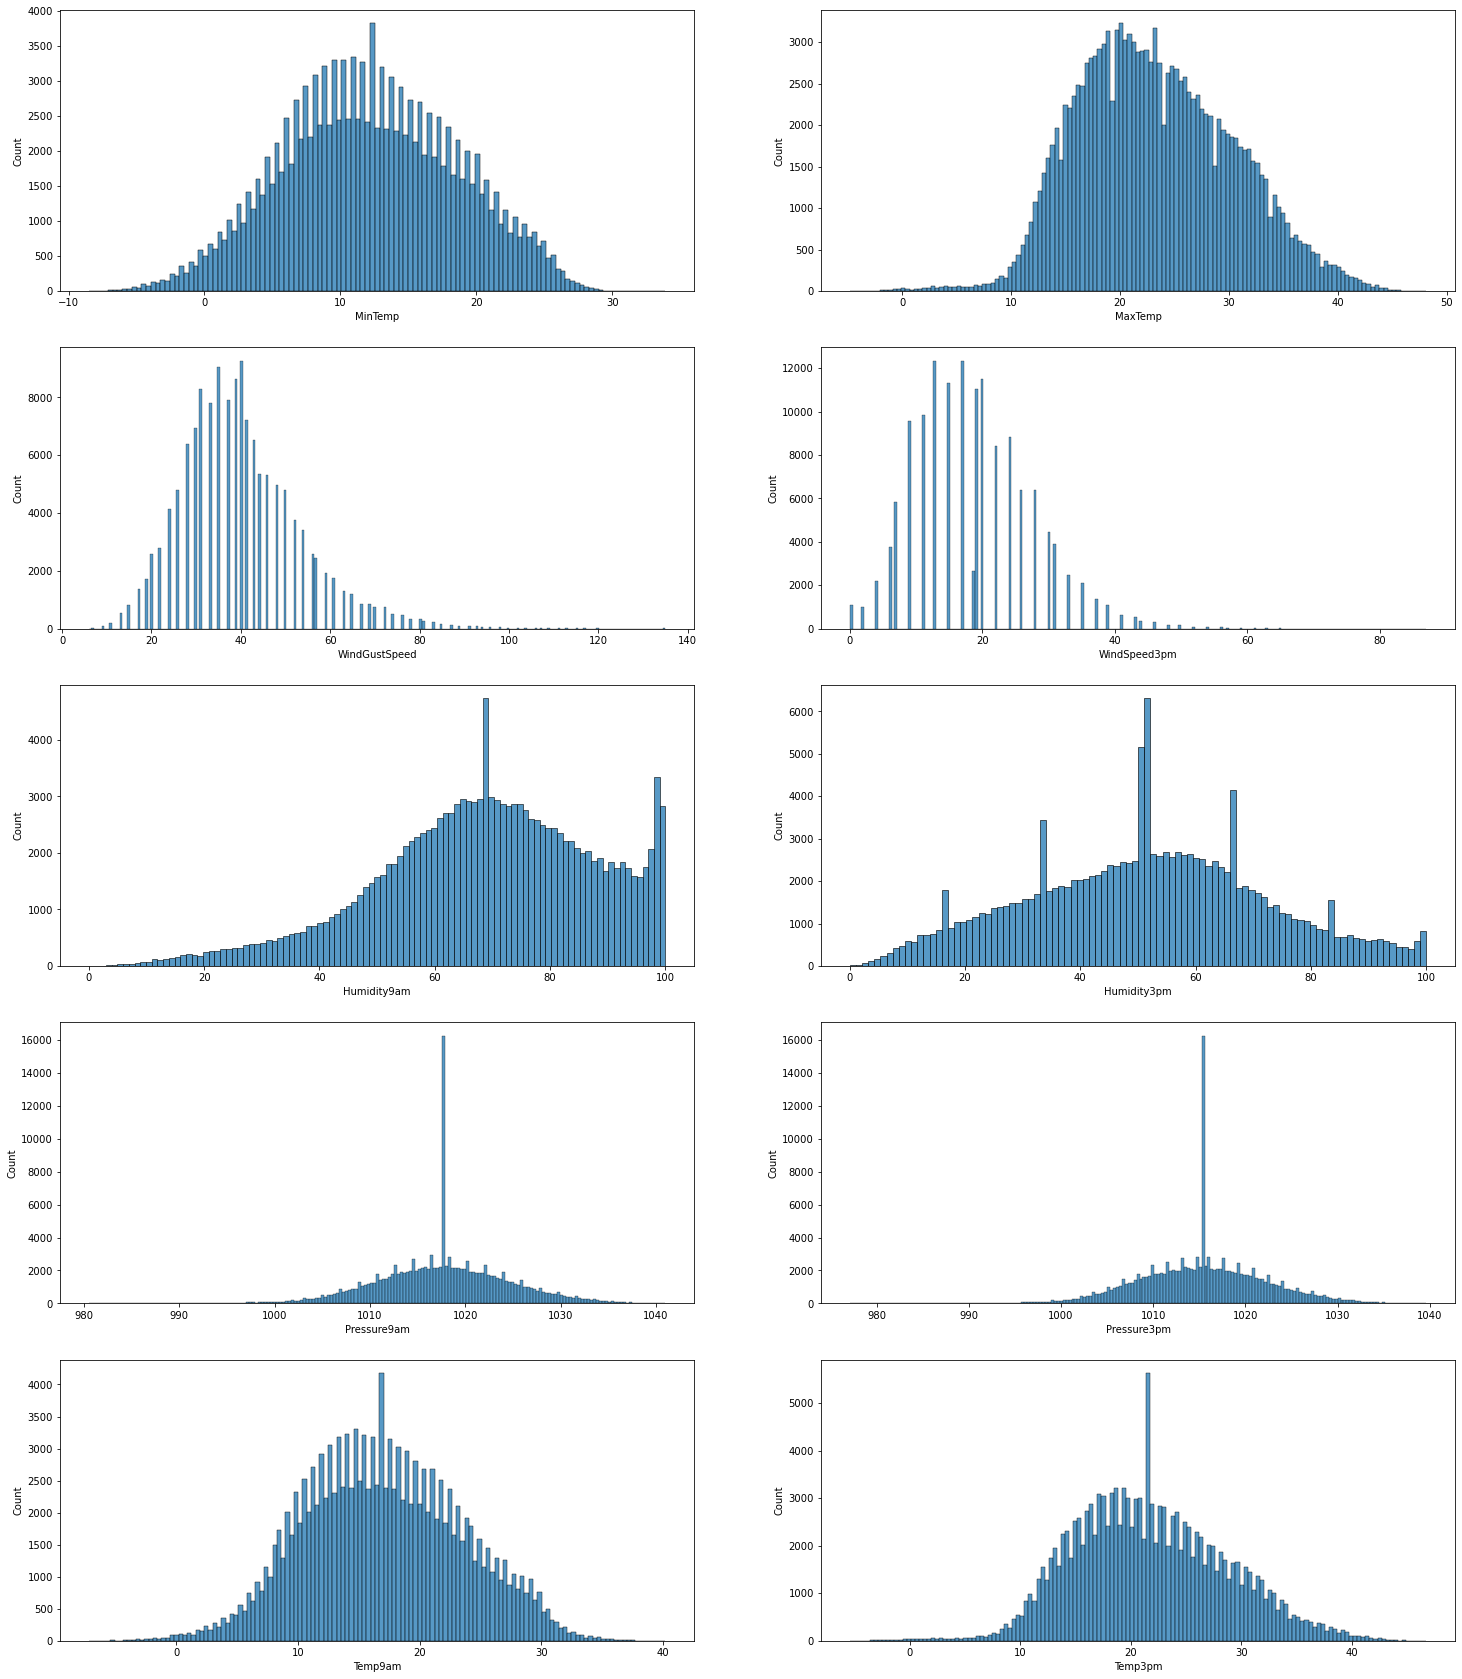

In [3]:
import seaborn as sns

plt.figure(figsize=(25,30))
plt.subplot(5,2,1)
sns.histplot(df,x='MinTemp')
plt.subplot(5,2,2)
sns.histplot(df,x='MaxTemp')
plt.subplot(5,2,3)
sns.histplot(df,x='WindGustSpeed')
plt.subplot(5,2,4)
sns.histplot(df,x='WindSpeed3pm')
plt.subplot(5,2,5)
sns.histplot(df,x='Humidity9am')
plt.subplot(5,2,6)
sns.histplot(df,x='Humidity3pm')
plt.subplot(5,2,7)
sns.histplot(df,x='Pressure9am')
plt.subplot(5,2,8)
sns.histplot(df,x='Pressure3pm')
plt.subplot(5,2,9)
sns.histplot(df,x='Temp9am')
plt.subplot(5,2,10)
sns.histplot(df,x='Temp3pm')
plt.show()

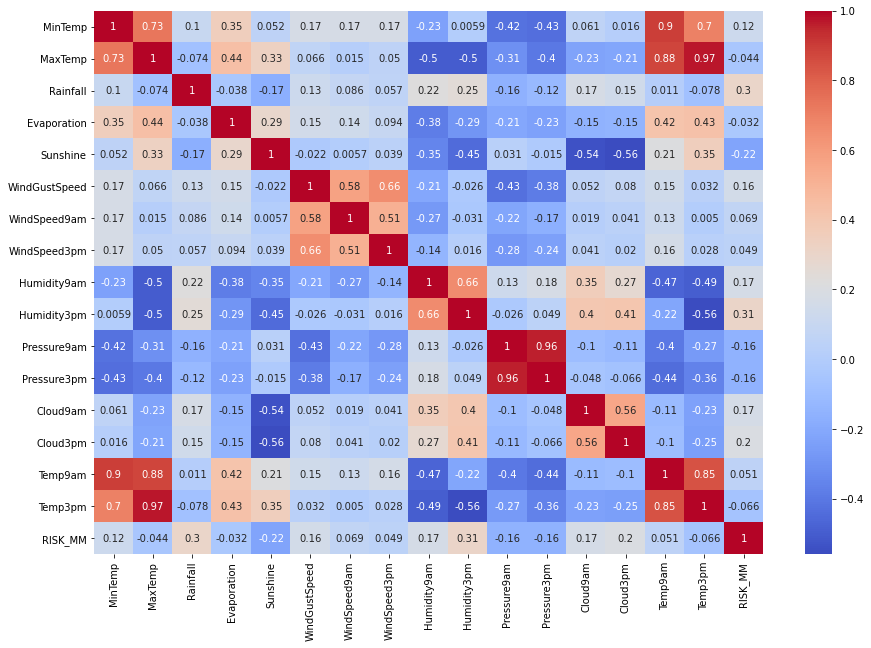

In [4]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

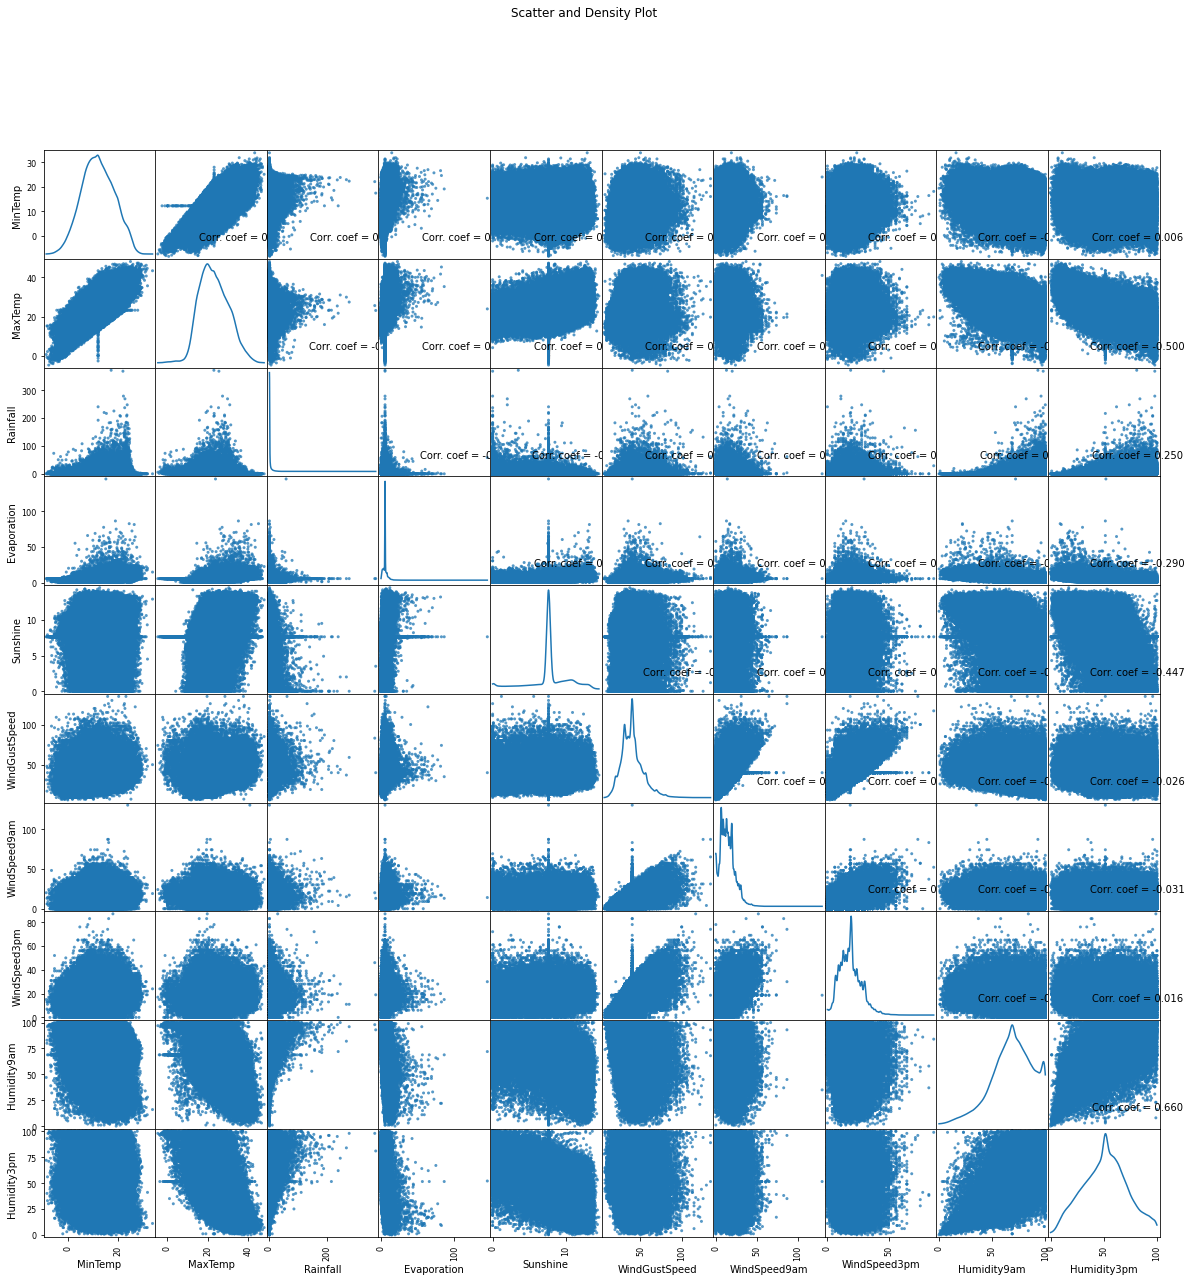

In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
plotScatterMatrix(df, 20, 10)

In [6]:
# Create a list of unique locations (cities)
loc_list=list(df.Location2.unique())

geolocator = Nominatim(user_agent="add-your-agent-name")
country ="Australia"
loc_res=[]

pbar=ProgressBar() # This will help us to show the progress of our iteration
for city in pbar(loc_list):
    loc = geolocator.geocode(city+','+ country)
    res = [city, loc.latitude, loc.longitude]
    loc_res = loc_res + [res]
    time.sleep(1) # sleep for 1 second before submitting the next query

# Add locations to a dataframe
df_loc=pd.DataFrame(loc_res, columns=['Loc', 'Latitude', 'Longitude'])

# Show data
df_loc

100% (49 of 49) |########################| Elapsed Time: 0:00:51 Time:  0:00:51


Loc   Latitude   Longitude
0               Albury -36.080477  146.916280
1       Badgerys Creek -33.881667  150.744163
2                Cobar -31.498333  145.834444
3        Coffs Harbour -30.296241  153.113529
4                Moree -29.461720  149.840715
5            Newcastle -32.919295  151.779535
6           Norah Head -33.281667  151.567778
7       Norfolk Island -29.028958  167.958729
8              Penrith -33.751079  150.694168
9             Richmond -20.569655  142.928360
10              Sydney -33.854816  151.216454
11      Sydney Airport -33.949894  151.181968
12         Wagga Wagga -35.115000  147.367778
13         Williamtown -32.815000  151.842778
14          Wollongong -34.424394  150.893850
15            Canberra -35.297591  149.101268
16         Tuggeranong -35.420977  149.092134
17        Mount Ginini -35.529720  148.772635
18            Ballarat -37.562303  143.860565
19             Bendigo -36.758877  144.282593
20                Sale -38.105036  147.064790
21   Melbourne Airport -37.667111  144.833481
22           Melbourne -37.814218  144.963161
23             Mildura -34.184726  142.162497
24                Nhil -35.432528  141.283319
25            Portland -38.345623  141.604230
26            Watsonia -37.711002  145.083635
27            Dartmoor -37.922544  141.276655
28            Brisbane -27.468968  153.023499
29              Cairns -16.920666  145.772185
30          Gold Coast -28.002373  153.414599
31          Townsville -19.256939  146.823954
32            Adelaide -34.928181  138.599931
33       Mount Gambier -37.824670  140.782007
34           Nuriootpa -34.469335  138.993901
35             Woomera -31.199914  136.825353
36              Albany -35.024782  117.883608
37         Witchcliffe -34.026335  115.100477
38  Pearce, Bullsbrook -31.673960  116.017544
39       Perth Airport -31.940610  115.967608
40               Perth -31.952712  115.860480
41         Salmon Gums -32.981535  121.643942
42             Walpole -34.977680  116.731006
43              Hobart -42.882509  147.328123
44          Launceston -41.434081  147.137350
45       Alice Springs -23.698388  133.881289
46              Darwin -12.460440  130.841047
47           Katherine -14.464616  132.263599
48               Uluru -25.345554  131.036961

In [7]:
# Create a figure
fig = go.Figure(data=go.Scattergeo(
        lat=df_loc['Latitude'],
        lon=df_loc['Longitude'],
        hovertext=df_loc['Loc'], 
        mode = 'markers',
        marker_color = 'black',
        ))

# Update layout so we can zoom in on Australia
fig.update_layout(
        width=980,
        height=720,
        margin={"r":0,"t":10,"l":0,"b":10},
        geo = dict(
            scope='world',
            projection_type='miller',
            landcolor = "rgb(250, 250, 250)",
            center=dict(lat=-25.69839, lon=139.8813), # focus point
            projection_scale=6 # zoom in on
        ),
    )
fig.show()

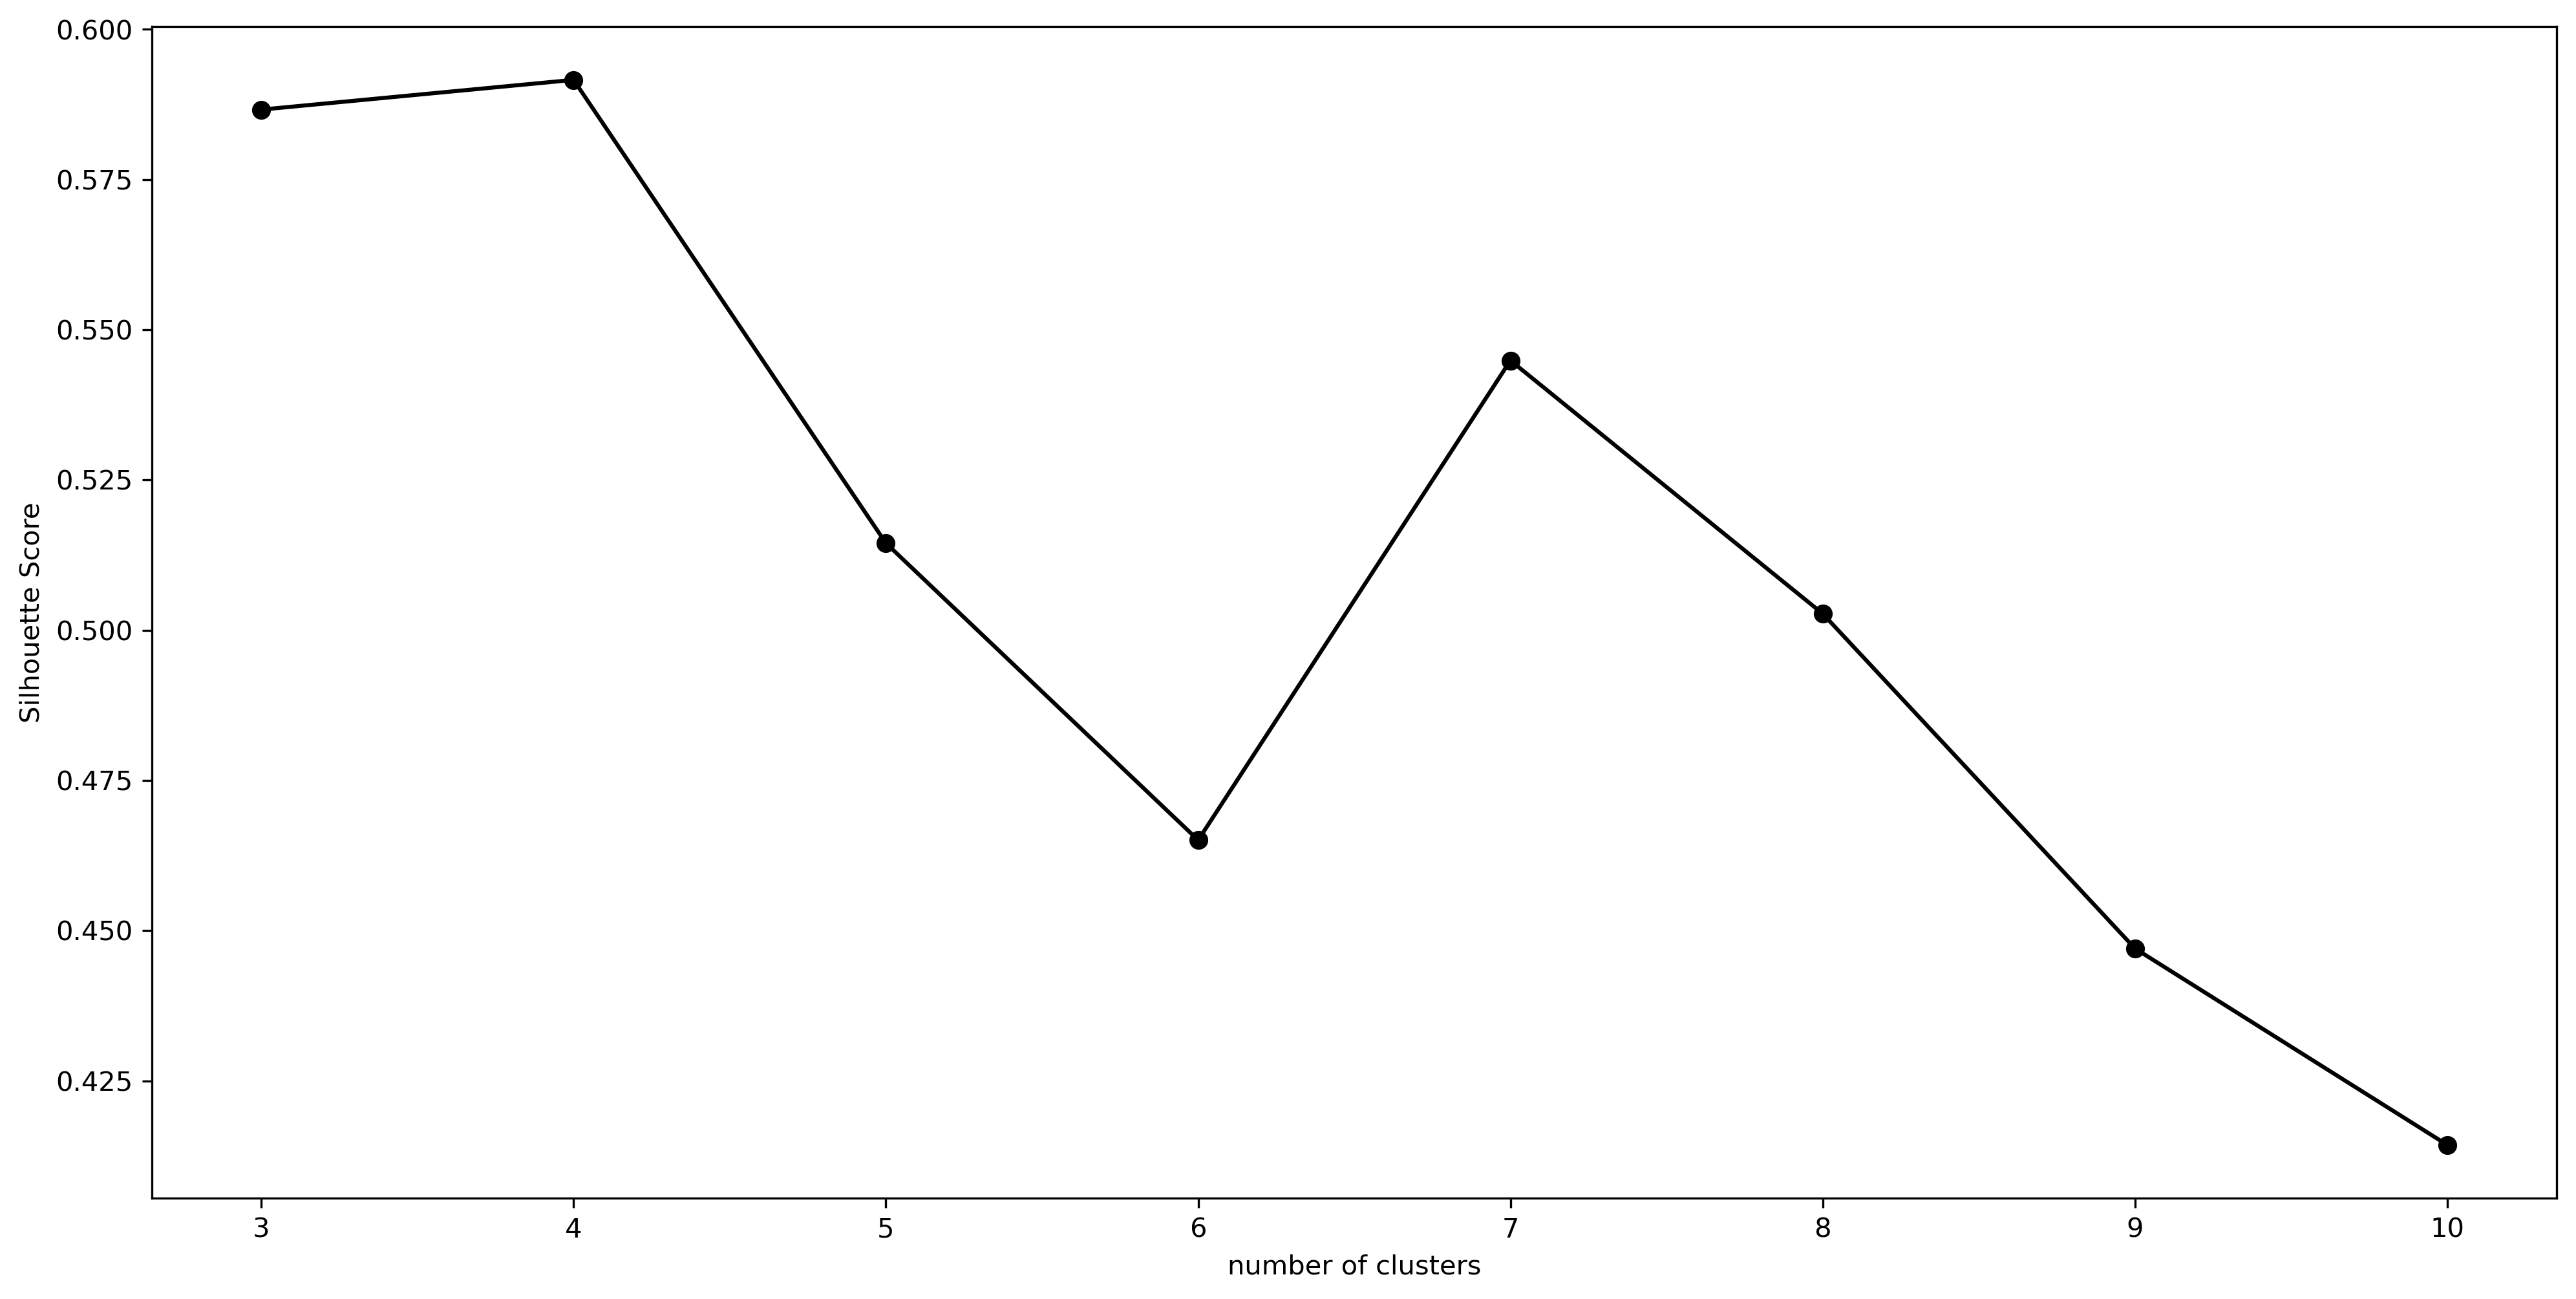

In [8]:
# Create empty list
S=[]

# Range of clusters to try (2 to 10)
K=range(3,11)

# Select data for clustering model
X = df_loc[['Latitude', 'Longitude']]

for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(X, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [9]:
# Select data for clustering model
X = df_loc[['Longitude', 'Latitude']]

# Set the model and its parameters - 4 clusters
model4 = GaussianMixture(n_components=4, # this is the number of clusters
                         covariance_type='full', # {‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’
                         max_iter=100, # the number of EM iterations to perform. default=100
                         n_init=1, # the number of initializations to perform. default = 1
                         init_params='kmeans', # the method used to initialize the weights, the means and the precisions. {'random' or default='k-means'}
                         verbose=0, # default 0, {0,1,2}
                         random_state=1 # for reproducibility
                        )

# Fit the model and predict labels
clust4 = model4.fit(X)
labels4 = model4.predict(X)

# Generate 10,000 new samples based on the model
smpl=model4.sample(n_samples=7500)

# Print model summary
print('*************** 4 Cluster Model ***************')
#print('Weights: ', clust4.weights_)
print('Means: ', clust4.means_)
#print('Covariances: ', clust4.covariances_)
#print('Precisions: ', clust4.precisions_)
#print('Precisions Cholesky: ', clust4.precisions_cholesky_)
print('Converged: ', clust4.converged_)
print(' No. of Iterations: ', clust4.n_iter_)
#print('Lower Bound: ', clust4.lower_bound_)

*************** 4 Cluster Model ***************
Means:  [[117.02898395 -33.22539114]
 [150.09565122 -33.4669607 ]
 [142.60871152 -37.09447264]
 [137.76729676 -19.04705768]]
Converged:  True
 No. of Iterations:  10


In [10]:
# Attach cluster labels to the main dataframe
df_loc['Clust4']=labels4

# Create a figure
fig = go.Figure(data=go.Scattergeo(
        lat=df_loc['Latitude'],
        lon=df_loc['Longitude'],
        hovertext=df_loc[['Loc', 'Clust4']], 
        mode = 'markers',
        marker=dict(colorscale=['#ae34eb', 'red', 'blue', '#34eb34']),
        marker_color = df_loc['Clust4'],
        ))

# Update layout so we can zoom in on Australia
fig.update_layout(
        showlegend=False,
        width=1000,
        height=760,
        margin={"r":0,"t":30,"l":0,"b":10},
        geo = dict(
            scope='world',
            projection_type='miller',
            landcolor = "rgb(250, 250, 250)",
            center=dict(lat=-25.69839, lon=139.8813), # focus point
            projection_scale=6 # zoom in on
        ),
    )
fig.show()

In [11]:

# Create a figure
fig = go.Figure(data=go.Scattergeo(
        lat=smpl[0][:,1],
        lon=smpl[0][:,0],
        mode = 'markers',
        marker=dict(colorscale=['#ae34eb', 'red', 'blue', '#34eb34']),
        marker_color = smpl[1],
        marker_size=3
        ))

# Update layout so we can zoom in on Australia
fig.update_layout(
        showlegend=False,
        width=1000,
        height=760,
        margin={"r":0,"t":30,"l":0,"b":10},
        geo = dict(
            scope='world',
            projection_type='miller',
            landcolor = "rgb(250, 250, 250)",
            center=dict(lat=-25.69839, lon=139.8813), # focus point
            projection_scale=6 # zoom in on
        ),
    )
fig.show()